## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [44]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [45]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [46]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [47]:
def build_mlp():
    """Code Here
    建立你的神經網路
    """
    
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10,activation="softmax")(x)
    
    model = keras.models.Model(inputs = [input_layer], outputs = [out])

    return model

model = build_mlp()
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [12]:
"""
Compile 模型
"""
optimizer = keras.optimizers.Adam(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer = optimizer)

In [13]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 9s 178us/step - loss: 0.0716 - accuracy: 0.9757 - val_loss: 7.2189 - val_accuracy: 0.4852
Epoch 2/500
50000/50000 [==============================] - 9s 171us/step - loss: 0.0854 - accuracy: 0.9710 - val_loss: 7.0618 - val_accuracy: 0.4853
Epoch 3/500
50000/50000 [==============================] - 9s 171us/step - loss: 0.0678 - accuracy: 0.9770 - val_loss: 7.1554 - val_accuracy: 0.4920
Epoch 4/500
50000/50000 [==============================] - 9s 174us/step - loss: 0.0580 - accuracy: 0.9806 - val_loss: 7.3096 - val_accuracy: 0.4847
Epoch 5/500
50000/50000 [==============================] - 9s 172us/step - loss: 0.0725 - accuracy: 0.9758 - val_loss: 7.1441 - val_accuracy: 0.4865
Epoch 6/500
50000/50000 [==============================] - 9s 173us/step - loss: 0.0987 - accuracy: 0.9668 - val_loss: 7.2335 - val_accuracy: 0.4819
Epoch 7/500
50000/50000 [==============================]

50000/50000 [==============================] - 9s 174us/step - loss: 0.7208 - accuracy: 0.8565 - val_loss: 6.4748 - val_accuracy: 0.4865
Epoch 56/500
50000/50000 [==============================] - 9s 173us/step - loss: 0.1277 - accuracy: 0.9586 - val_loss: 6.8975 - val_accuracy: 0.4885
Epoch 57/500
50000/50000 [==============================] - 8s 170us/step - loss: 0.0430 - accuracy: 0.9857 - val_loss: 7.0690 - val_accuracy: 0.4886
Epoch 58/500
50000/50000 [==============================] - 9s 174us/step - loss: 0.0177 - accuracy: 0.9955 - val_loss: 7.1514 - val_accuracy: 0.4918
Epoch 59/500
50000/50000 [==============================] - 9s 175us/step - loss: 0.0077 - accuracy: 0.9991 - val_loss: 7.3422 - val_accuracy: 0.4903
Epoch 60/500
50000/50000 [==============================] - 9s 174us/step - loss: 0.0037 - accuracy: 0.9999 - val_loss: 7.3688 - val_accuracy: 0.4927
Epoch 61/500
50000/50000 [==============================] - 9s 174us/step - loss: 0.0027 - accuracy: 0.9999 - val

50000/50000 [==============================] - 9s 173us/step - loss: 0.0019 - accuracy: 0.9999 - val_loss: 7.0748 - val_accuracy: 0.4950
Epoch 110/500
50000/50000 [==============================] - 9s 173us/step - loss: 0.6369 - accuracy: 0.8486 - val_loss: 5.0257 - val_accuracy: 0.4742
Epoch 111/500
50000/50000 [==============================] - 9s 170us/step - loss: 0.1507 - accuracy: 0.9495 - val_loss: 5.5652 - val_accuracy: 0.4886
Epoch 112/500
50000/50000 [==============================] - 8s 169us/step - loss: 0.0418 - accuracy: 0.9873 - val_loss: 5.7567 - val_accuracy: 0.4948
Epoch 113/500
50000/50000 [==============================] - 8s 164us/step - loss: 0.0181 - accuracy: 0.9966 - val_loss: 5.9435 - val_accuracy: 0.4945
Epoch 114/500
50000/50000 [==============================] - 8s 163us/step - loss: 0.0073 - accuracy: 0.9997 - val_loss: 6.1281 - val_accuracy: 0.4974
Epoch 115/500
50000/50000 [==============================] - 8s 163us/step - loss: 0.0049 - accuracy: 1.0000

50000/50000 [==============================] - 8s 161us/step - loss: 0.0084 - accuracy: 0.9995 - val_loss: 5.8572 - val_accuracy: 0.4995
Epoch 164/500
50000/50000 [==============================] - 8s 161us/step - loss: 0.0062 - accuracy: 0.9998 - val_loss: 5.9713 - val_accuracy: 0.4968
Epoch 165/500
50000/50000 [==============================] - 8s 161us/step - loss: 0.0043 - accuracy: 1.0000 - val_loss: 6.1181 - val_accuracy: 0.4972
Epoch 166/500
50000/50000 [==============================] - 8s 161us/step - loss: 0.0033 - accuracy: 1.0000 - val_loss: 6.2057 - val_accuracy: 0.5005
Epoch 167/500
50000/50000 [==============================] - 8s 161us/step - loss: 0.0035 - accuracy: 0.9999 - val_loss: 6.3020 - val_accuracy: 0.4988
Epoch 168/500
50000/50000 [==============================] - 8s 161us/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 6.4048 - val_accuracy: 0.5002
Epoch 169/500
50000/50000 [==============================] - 8s 161us/step - loss: 0.0021 - accuracy: 1.0000

50000/50000 [==============================] - 8s 161us/step - loss: 0.0185 - accuracy: 0.9961 - val_loss: 5.6376 - val_accuracy: 0.4923
Epoch 218/500
50000/50000 [==============================] - 8s 162us/step - loss: 0.0077 - accuracy: 0.9997 - val_loss: 5.8841 - val_accuracy: 0.4950
Epoch 219/500
50000/50000 [==============================] - 8s 162us/step - loss: 0.0046 - accuracy: 0.9999 - val_loss: 5.9914 - val_accuracy: 0.4973
Epoch 220/500
50000/50000 [==============================] - 8s 161us/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 6.1122 - val_accuracy: 0.4958
Epoch 221/500
50000/50000 [==============================] - 8s 161us/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 6.2235 - val_accuracy: 0.4946
Epoch 222/500
50000/50000 [==============================] - 8s 161us/step - loss: 0.0046 - accuracy: 0.9995 - val_loss: 6.3727 - val_accuracy: 0.4924
Epoch 223/500
50000/50000 [==============================] - 8s 161us/step - loss: 0.3516 - accuracy: 0.9020

50000/50000 [==============================] - 8s 161us/step - loss: 6.8552e-04 - accuracy: 1.0000 - val_loss: 7.3241 - val_accuracy: 0.4958
Epoch 272/500
50000/50000 [==============================] - 8s 162us/step - loss: 6.1976e-04 - accuracy: 1.0000 - val_loss: 7.3957 - val_accuracy: 0.4969
Epoch 273/500
50000/50000 [==============================] - 8s 162us/step - loss: 5.6185e-04 - accuracy: 1.0000 - val_loss: 7.4728 - val_accuracy: 0.4965
Epoch 274/500
50000/50000 [==============================] - 8s 161us/step - loss: 5.1701e-04 - accuracy: 1.0000 - val_loss: 7.5690 - val_accuracy: 0.4963
Epoch 275/500
50000/50000 [==============================] - 8s 163us/step - loss: 0.5410 - accuracy: 0.8969 - val_loss: 4.1165 - val_accuracy: 0.4475
Epoch 276/500
50000/50000 [==============================] - 8s 168us/step - loss: 0.3926 - accuracy: 0.8794 - val_loss: 4.8870 - val_accuracy: 0.4898
Epoch 277/500
50000/50000 [==============================] - 8s 162us/step - loss: 0.0659 - 

50000/50000 [==============================] - 8s 161us/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 6.6250 - val_accuracy: 0.4986
Epoch 326/500
50000/50000 [==============================] - 8s 161us/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 6.7148 - val_accuracy: 0.4977
Epoch 327/500
50000/50000 [==============================] - 8s 161us/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 6.8040 - val_accuracy: 0.4988
Epoch 328/500
50000/50000 [==============================] - 8s 161us/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 6.8745 - val_accuracy: 0.4976
Epoch 329/500
50000/50000 [==============================] - 8s 161us/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 6.9806 - val_accuracy: 0.4992
Epoch 330/500
50000/50000 [==============================] - 8s 162us/step - loss: 8.7490e-04 - accuracy: 1.0000 - val_loss: 7.0561 - val_accuracy: 0.4988
Epoch 331/500
50000/50000 [==============================] - 8s 162us/step - loss: 7.7405e-04 - accuracy

50000/50000 [==============================] - 8s 163us/step - loss: 8.2033e-04 - accuracy: 1.0000 - val_loss: 8.4668 - val_accuracy: 0.4932
Epoch 380/500
50000/50000 [==============================] - 8s 161us/step - loss: 6.1570e-04 - accuracy: 1.0000 - val_loss: 8.5145 - val_accuracy: 0.4934
Epoch 381/500
50000/50000 [==============================] - 8s 162us/step - loss: 5.3917e-04 - accuracy: 1.0000 - val_loss: 8.5582 - val_accuracy: 0.4942
Epoch 382/500
50000/50000 [==============================] - 8s 161us/step - loss: 4.7233e-04 - accuracy: 1.0000 - val_loss: 8.6095 - val_accuracy: 0.4952
Epoch 383/500
50000/50000 [==============================] - 8s 161us/step - loss: 4.3603e-04 - accuracy: 1.0000 - val_loss: 8.6465 - val_accuracy: 0.4952
Epoch 384/500
50000/50000 [==============================] - 8s 162us/step - loss: 4.0086e-04 - accuracy: 1.0000 - val_loss: 8.6869 - val_accuracy: 0.4966
Epoch 385/500
50000/50000 [==============================] - 8s 162us/step - loss: 3

Epoch 433/500
50000/50000 [==============================] - 8s 158us/step - loss: 0.0083 - accuracy: 0.9990 - val_loss: 6.4764 - val_accuracy: 0.5000
Epoch 434/500
50000/50000 [==============================] - 8s 159us/step - loss: 0.0033 - accuracy: 1.0000 - val_loss: 6.6269 - val_accuracy: 0.4978
Epoch 435/500
50000/50000 [==============================] - 8s 158us/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 6.7182 - val_accuracy: 0.4992
Epoch 436/500
50000/50000 [==============================] - 8s 158us/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 6.8240 - val_accuracy: 0.4985
Epoch 437/500
50000/50000 [==============================] - 8s 158us/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 6.9144 - val_accuracy: 0.4985
Epoch 438/500
50000/50000 [==============================] - 8s 158us/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 7.0057 - val_accuracy: 0.4973
Epoch 439/500
50000/50000 [==============================] - 8s 159us/step - loss: 0.0012 - ac

Epoch 487/500
50000/50000 [==============================] - 8s 161us/step - loss: 0.3579 - accuracy: 0.9027 - val_loss: 6.4250 - val_accuracy: 0.4860
Epoch 488/500
50000/50000 [==============================] - 8s 165us/step - loss: 0.0728 - accuracy: 0.9764 - val_loss: 6.7009 - val_accuracy: 0.4925
Epoch 489/500
50000/50000 [==============================] - 8s 168us/step - loss: 0.0311 - accuracy: 0.9902 - val_loss: 6.7079 - val_accuracy: 0.4945
Epoch 490/500
50000/50000 [==============================] - 8s 163us/step - loss: 0.0092 - accuracy: 0.9983 - val_loss: 6.9428 - val_accuracy: 0.4948
Epoch 491/500
50000/50000 [==============================] - 8s 164us/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 7.1047 - val_accuracy: 0.5013
Epoch 492/500
50000/50000 [==============================] - 8s 163us/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 7.1732 - val_accuracy: 0.5023
Epoch 493/500
50000/50000 [==============================] - 8s 163us/step - loss: 0.0013 - ac

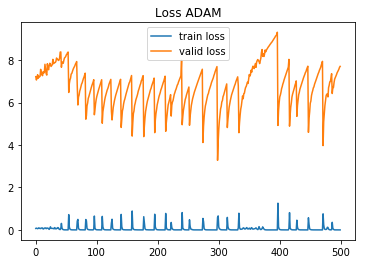

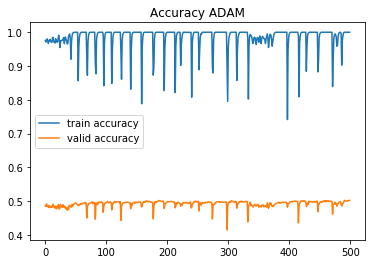

In [14]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss ADAM")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy ADAM")
plt.show()

In [48]:
"""
Compile 模型
"""
# keras.backend.clear_session()
optimizer = keras.optimizers.SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer = optimizer)

In [49]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 6s 127us/step - loss: 2.0840 - accuracy: 0.2563 - val_loss: 1.9351 - val_accuracy: 0.3141
Epoch 2/500
50000/50000 [==============================] - 6s 122us/step - loss: 1.8789 - accuracy: 0.3385 - val_loss: 1.8301 - val_accuracy: 0.3519
Epoch 3/500
50000/50000 [==============================] - 6s 122us/step - loss: 1.8031 - accuracy: 0.3650 - val_loss: 1.7744 - val_accuracy: 0.3764
Epoch 4/500
50000/50000 [==============================] - 6s 122us/step - loss: 1.7535 - accuracy: 0.3820 - val_loss: 1.7313 - val_accuracy: 0.3878
Epoch 5/500
50000/50000 [==============================] - 6s 122us/step - loss: 1.7138 - accuracy: 0.3953 - val_loss: 1.6960 - val_accuracy: 0.4038
Epoch 6/500
50000/50000 [==============================] - 6s 124us/step - loss: 1.6810 - accuracy: 0.4077 - val_loss: 1.6612 - val_accuracy: 0.4167
Epoch 7/500
50000/50000 [==============================]

50000/50000 [==============================] - 6s 122us/step - loss: 1.1112 - accuracy: 0.6086 - val_loss: 1.3977 - val_accuracy: 0.5094
Epoch 56/500
50000/50000 [==============================] - 6s 122us/step - loss: 1.1009 - accuracy: 0.6117 - val_loss: 1.3815 - val_accuracy: 0.5094
Epoch 57/500
50000/50000 [==============================] - 6s 122us/step - loss: 1.0943 - accuracy: 0.6158 - val_loss: 1.3673 - val_accuracy: 0.5178
Epoch 58/500
50000/50000 [==============================] - 6s 124us/step - loss: 1.0883 - accuracy: 0.6181 - val_loss: 1.3795 - val_accuracy: 0.5201
Epoch 59/500
50000/50000 [==============================] - 6s 126us/step - loss: 1.0762 - accuracy: 0.6224 - val_loss: 1.3793 - val_accuracy: 0.5206
Epoch 60/500
50000/50000 [==============================] - 6s 123us/step - loss: 1.0687 - accuracy: 0.6235 - val_loss: 1.4260 - val_accuracy: 0.5016
Epoch 61/500
50000/50000 [==============================] - 7s 137us/step - loss: 1.0631 - accuracy: 0.6265 - val

50000/50000 [==============================] - 7s 131us/step - loss: 0.7251 - accuracy: 0.7483 - val_loss: 1.5068 - val_accuracy: 0.5190
Epoch 110/500
50000/50000 [==============================] - 6s 127us/step - loss: 0.7232 - accuracy: 0.7493 - val_loss: 1.5333 - val_accuracy: 0.5183
Epoch 111/500
50000/50000 [==============================] - 7s 138us/step - loss: 0.7269 - accuracy: 0.7478 - val_loss: 1.5620 - val_accuracy: 0.5077
Epoch 112/500
50000/50000 [==============================] - 7s 135us/step - loss: 0.7092 - accuracy: 0.7545 - val_loss: 1.6567 - val_accuracy: 0.4938
Epoch 113/500
50000/50000 [==============================] - 8s 152us/step - loss: 0.7048 - accuracy: 0.7562 - val_loss: 1.6055 - val_accuracy: 0.5009
Epoch 114/500
50000/50000 [==============================] - 6s 127us/step - loss: 0.6977 - accuracy: 0.7588 - val_loss: 1.6584 - val_accuracy: 0.4984
Epoch 115/500
50000/50000 [==============================] - 6s 128us/step - loss: 0.6955 - accuracy: 0.7581

50000/50000 [==============================] - 6s 120us/step - loss: 0.4163 - accuracy: 0.8632 - val_loss: 1.9909 - val_accuracy: 0.5026
Epoch 164/500
50000/50000 [==============================] - 6s 119us/step - loss: 0.4069 - accuracy: 0.8665 - val_loss: 1.8015 - val_accuracy: 0.5232
Epoch 165/500
50000/50000 [==============================] - 6s 118us/step - loss: 0.4005 - accuracy: 0.8690 - val_loss: 2.0693 - val_accuracy: 0.4852
Epoch 166/500
50000/50000 [==============================] - 6s 121us/step - loss: 0.3999 - accuracy: 0.8697 - val_loss: 1.9296 - val_accuracy: 0.5123
Epoch 167/500
50000/50000 [==============================] - 6s 119us/step - loss: 0.3902 - accuracy: 0.8714 - val_loss: 1.9819 - val_accuracy: 0.5059
Epoch 168/500
50000/50000 [==============================] - 6s 119us/step - loss: 0.3811 - accuracy: 0.8762 - val_loss: 1.9586 - val_accuracy: 0.5156
Epoch 169/500
50000/50000 [==============================] - 6s 119us/step - loss: 0.3920 - accuracy: 0.8723

50000/50000 [==============================] - 6s 119us/step - loss: 0.1675 - accuracy: 0.9552 - val_loss: 2.3517 - val_accuracy: 0.5205
Epoch 218/500
50000/50000 [==============================] - 6s 120us/step - loss: 0.1914 - accuracy: 0.9460 - val_loss: 2.3917 - val_accuracy: 0.5152
Epoch 219/500
50000/50000 [==============================] - 6s 123us/step - loss: 0.1666 - accuracy: 0.9551 - val_loss: 2.3458 - val_accuracy: 0.5203
Epoch 220/500
50000/50000 [==============================] - 6s 121us/step - loss: 0.1918 - accuracy: 0.9437 - val_loss: 2.3578 - val_accuracy: 0.5205
Epoch 221/500
50000/50000 [==============================] - 6s 120us/step - loss: 0.1562 - accuracy: 0.9581 - val_loss: 2.6745 - val_accuracy: 0.4963
Epoch 222/500
50000/50000 [==============================] - 6s 120us/step - loss: 0.1749 - accuracy: 0.9515 - val_loss: 2.3661 - val_accuracy: 0.5226
Epoch 223/500
50000/50000 [==============================] - 6s 120us/step - loss: 0.1436 - accuracy: 0.9639

50000/50000 [==============================] - 6s 118us/step - loss: 0.0857 - accuracy: 0.9833 - val_loss: 2.8644 - val_accuracy: 0.5027
Epoch 272/500
50000/50000 [==============================] - 6s 119us/step - loss: 0.0820 - accuracy: 0.9842 - val_loss: 2.7132 - val_accuracy: 0.5186
Epoch 273/500
50000/50000 [==============================] - 6s 126us/step - loss: 0.0713 - accuracy: 0.9885 - val_loss: 3.1898 - val_accuracy: 0.4891
Epoch 274/500
50000/50000 [==============================] - 6s 125us/step - loss: 0.0875 - accuracy: 0.9823 - val_loss: 2.7251 - val_accuracy: 0.5233
Epoch 275/500
50000/50000 [==============================] - 6s 121us/step - loss: 0.0696 - accuracy: 0.9889 - val_loss: 2.7604 - val_accuracy: 0.5188
Epoch 276/500
50000/50000 [==============================] - 6s 121us/step - loss: 0.0677 - accuracy: 0.9890 - val_loss: 2.7704 - val_accuracy: 0.5136
Epoch 277/500
50000/50000 [==============================] - 6s 119us/step - loss: 0.0668 - accuracy: 0.9893

50000/50000 [==============================] - 6s 120us/step - loss: 0.0209 - accuracy: 0.9990 - val_loss: 3.1881 - val_accuracy: 0.5260
Epoch 326/500
50000/50000 [==============================] - 6s 121us/step - loss: 0.0217 - accuracy: 0.9988 - val_loss: 3.2129 - val_accuracy: 0.5267
Epoch 327/500
50000/50000 [==============================] - 6s 121us/step - loss: 0.0201 - accuracy: 0.9989 - val_loss: 3.2137 - val_accuracy: 0.5265
Epoch 328/500
50000/50000 [==============================] - 6s 120us/step - loss: 0.0198 - accuracy: 0.9992 - val_loss: 3.2229 - val_accuracy: 0.5262
Epoch 329/500
50000/50000 [==============================] - 6s 121us/step - loss: 0.0194 - accuracy: 0.9991 - val_loss: 3.2504 - val_accuracy: 0.5239
Epoch 330/500
50000/50000 [==============================] - 6s 120us/step - loss: 0.0189 - accuracy: 0.9993 - val_loss: 3.2334 - val_accuracy: 0.5235
Epoch 331/500
50000/50000 [==============================] - 6s 120us/step - loss: 0.0189 - accuracy: 0.9991

50000/50000 [==============================] - 6s 120us/step - loss: 0.0088 - accuracy: 0.9999 - val_loss: 3.5527 - val_accuracy: 0.5219
Epoch 380/500
50000/50000 [==============================] - 6s 120us/step - loss: 0.0088 - accuracy: 0.9999 - val_loss: 3.5557 - val_accuracy: 0.5235
Epoch 381/500
50000/50000 [==============================] - 6s 121us/step - loss: 0.0090 - accuracy: 0.9998 - val_loss: 3.5726 - val_accuracy: 0.5233
Epoch 382/500
50000/50000 [==============================] - 6s 119us/step - loss: 0.0087 - accuracy: 0.9998 - val_loss: 3.5692 - val_accuracy: 0.5229
Epoch 383/500
50000/50000 [==============================] - 6s 120us/step - loss: 0.0087 - accuracy: 0.9998 - val_loss: 3.5683 - val_accuracy: 0.5236
Epoch 384/500
50000/50000 [==============================] - 6s 120us/step - loss: 0.0087 - accuracy: 0.9998 - val_loss: 3.5820 - val_accuracy: 0.5237
Epoch 385/500
50000/50000 [==============================] - 6s 120us/step - loss: 0.0084 - accuracy: 0.9999

50000/50000 [==============================] - 6s 120us/step - loss: 0.0052 - accuracy: 1.0000 - val_loss: 3.7906 - val_accuracy: 0.5219
Epoch 434/500
50000/50000 [==============================] - 6s 120us/step - loss: 0.0053 - accuracy: 1.0000 - val_loss: 3.7978 - val_accuracy: 0.5236
Epoch 435/500
50000/50000 [==============================] - 6s 121us/step - loss: 0.0053 - accuracy: 1.0000 - val_loss: 3.7919 - val_accuracy: 0.5263
Epoch 436/500
50000/50000 [==============================] - 6s 120us/step - loss: 0.0051 - accuracy: 1.0000 - val_loss: 3.8090 - val_accuracy: 0.5254
Epoch 437/500
50000/50000 [==============================] - 6s 121us/step - loss: 0.0051 - accuracy: 1.0000 - val_loss: 3.8110 - val_accuracy: 0.5216
Epoch 438/500
50000/50000 [==============================] - 6s 120us/step - loss: 0.0051 - accuracy: 1.0000 - val_loss: 3.8064 - val_accuracy: 0.5236
Epoch 439/500
50000/50000 [==============================] - 6s 120us/step - loss: 0.0050 - accuracy: 1.0000

50000/50000 [==============================] - 6s 120us/step - loss: 0.0037 - accuracy: 1.0000 - val_loss: 3.9651 - val_accuracy: 0.5221
Epoch 488/500
50000/50000 [==============================] - 6s 120us/step - loss: 0.0036 - accuracy: 1.0000 - val_loss: 3.9705 - val_accuracy: 0.5225
Epoch 489/500
50000/50000 [==============================] - 6s 120us/step - loss: 0.0036 - accuracy: 1.0000 - val_loss: 3.9752 - val_accuracy: 0.5251
Epoch 490/500
50000/50000 [==============================] - 6s 120us/step - loss: 0.0036 - accuracy: 1.0000 - val_loss: 3.9728 - val_accuracy: 0.5243
Epoch 491/500
50000/50000 [==============================] - 6s 121us/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 3.9807 - val_accuracy: 0.5237
Epoch 492/500
50000/50000 [==============================] - 6s 119us/step - loss: 0.0036 - accuracy: 1.0000 - val_loss: 3.9819 - val_accuracy: 0.5248
Epoch 493/500
50000/50000 [==============================] - 6s 120us/step - loss: 0.0035 - accuracy: 1.0000

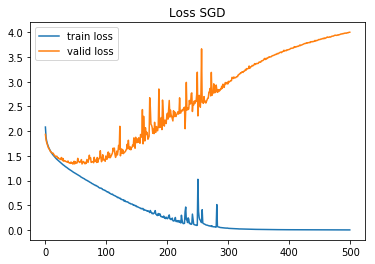

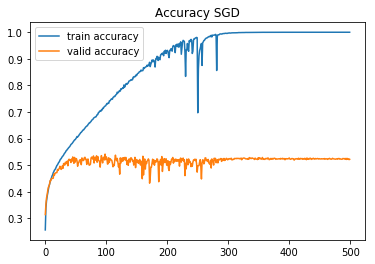

In [50]:
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss SGD")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy SGD")
plt.show()